In [1]:
from pattern_regression import *

In [2]:
# SETTINGS
patterns_csv = '../datasets/pvc_allregions_uptake_change_bilateral.csv'
lut_file = "../FreeSurferColorLUT.txt"
master_csv = '../FDG_AV45_COGdata/FDG_AV45_COGdata_01_06_16.csv'
membership_conf = 0.50
components = 100
ref_key = 'WHOLE_CEREBELLUM'
threshold = 1.2813
# ref_key = 'COMPOSITE_REF'
# threshold = 0.91711

# parse input
pattern_prior_df, pattern_post_df, uptake_prior_df, uptake_post_df, result_df, rchange_df = parseRawInput(patterns_csv, ref_key)

# # Calculate
# result_df = trainDPGMM(components, pattern_prior_df, pattern_post_df, result_df)

# Load
model_file = '../dpgmm_alpha15.4_bilateral_model.pkl'
best_model = cPickle.load(open(model_file, 'rb'))
alpha = best_model.alpha
result_df = loadResults(alpha, master_csv)

# generate conversion data
big_groups = bigGroups(result_df, threshold=3)
small_groups = smallGroups(result_df, threshold=50)
medium_groups = list(set(big_groups) & set(small_groups))
conversions = parseConversions(big_groups, result_df, threshold, master_keys)
conversions.to_csv('%s_conversions.csv' % generateFileRoot(alpha))
positive_patterns = list(conversions[conversions['pos-pos']>=0.8].index)
negative_patterns = list(conversions[conversions['neg-neg']>=0.9].index)
transition_patterns = list(set(conversions.index) - (set(positive_patterns) | set(negative_patterns)))
groups = {'positive': positive_patterns, 'negative': negative_patterns, 'transition': transition_patterns}
uptake_members, pattern_members, change_members, prior_members = mergeResults(result_df, pattern_prior_df, pattern_post_df, uptake_prior_df, uptake_post_df, rchange_df)

# create giant dataframe of merged results
uptake_tp, pattern_tp, change_tp, prior_tp = mergeResults(result_df, pattern_prior_df, pattern_post_df, uptake_prior_df, uptake_post_df, rchange_df, with_timepoint=True)
merged_members = prior_tp.copy().reset_index()
merged_members = merged_members.merge(uptake_tp[pattern_keys].reset_index(), on=['rid','timepoint'], how='outer')
merged_members = merged_members.merge(change_tp[change_keys].reset_index(), on=['rid','timepoint'], how='outer')
all_keys = master_keys+summary_keys+pattern_keys+change_keys


15.3967378869
15.3967378869


pattern_regression.py:313: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  uptake_prior_df.dropna(inplace=True)
pattern_regression.py:317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  uptake_post_df.dropna(inplace=True)


In [3]:
bl_changes = [('FSX_HC/ICV_BL_3months', 'FSX_HC/ICV_slope'),
              ('UW_EF_BL_3months','UW_EF_slope'),
              ('UW_MEM_BL_3months','UW_MEM_slope'),
              ('WMH_percentOfICV_AV45_6MTHS','WMH_percentOfICV_slope'),
              ('FDG_PONS_AV45_6MTHS','FDG_postAV45_slope'),
              ('CSF_TAU_closest_AV45','CSF_TAU_slope'),
              ('CSF_ABETA_closest_AV45','CSF_ABETA_slope'),]
to_scatter = [('CORTICAL_SUMMARY_prior', 'CORTICAL_SUMMARY_change')]
for bl, change in bl_changes:
    to_add = [('CORTICAL_SUMMARY_prior', bl),
              ('CORTICAL_SUMMARY_prior', change),
              ('CORTICAL_SUMMARY_change', change),
              (bl, change)]
    to_scatter += to_add

In [4]:
matplotlib inline

CORTICAL_SUMMARY_prior vs UW_EF_BL_3months: SLOPE_P: 0.01925, INT_P: 0.00154
CORTICAL_SUMMARY_prior vs UW_EF_slope: SLOPE_P: 0.04603, INT_P: 0.01614
CORTICAL_SUMMARY_change vs UW_EF_slope: SLOPE_P: 0.0064, INT_P: 0.92277
CORTICAL_SUMMARY_prior vs CSF_TAU_closest_AV45: SLOPE_P: 0.0, INT_P: 0.0
CORTICAL_SUMMARY_prior vs CSF_TAU_slope: SLOPE_P: 0.0, INT_P: 0.0
CORTICAL_SUMMARY_change vs CSF_TAU_slope: SLOPE_P: 0.0, INT_P: 0.80697
CSF_TAU_closest_AV45 vs CSF_TAU_slope: SLOPE_P: 0.54868, INT_P: 0.0
CORTICAL_SUMMARY_prior vs CSF_ABETA_closest_AV45: SLOPE_P: 0.28091, INT_P: 0.0
CORTICAL_SUMMARY_prior vs CSF_ABETA_slope: SLOPE_P: 0.0, INT_P: 0.0
CORTICAL_SUMMARY_change vs CSF_ABETA_slope: SLOPE_P: 0.0, INT_P: 0.01052
CSF_ABETA_closest_AV45 vs CSF_ABETA_slope: SLOPE_P: 0.81281, INT_P: 0.0


/Users/andyhorng/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


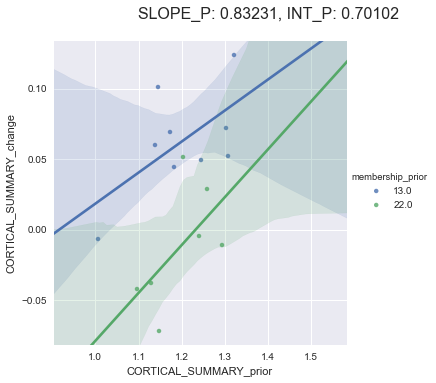

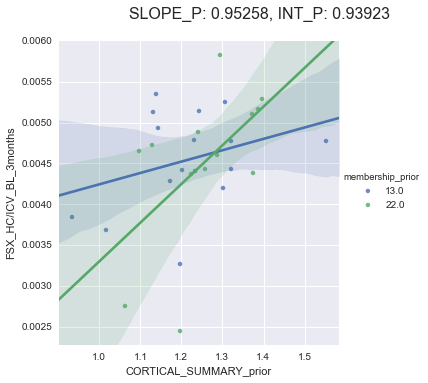

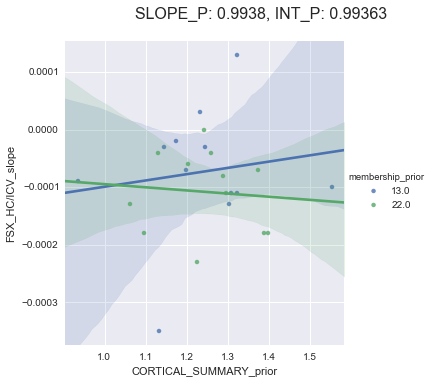

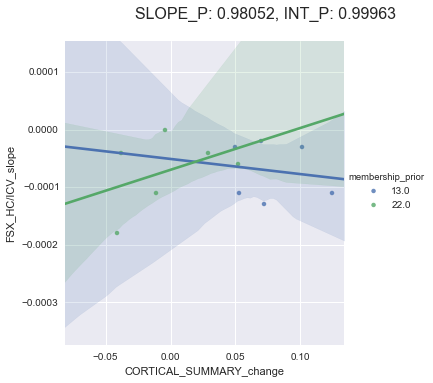

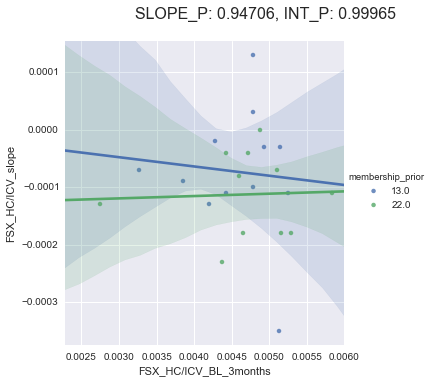

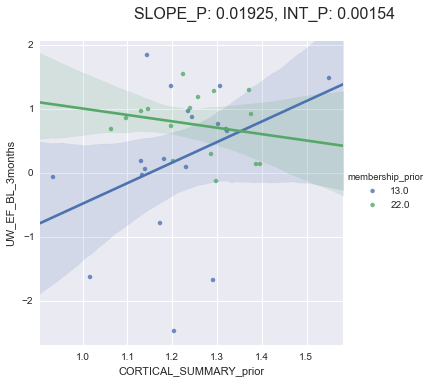

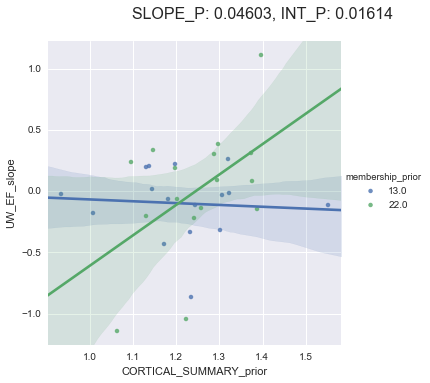

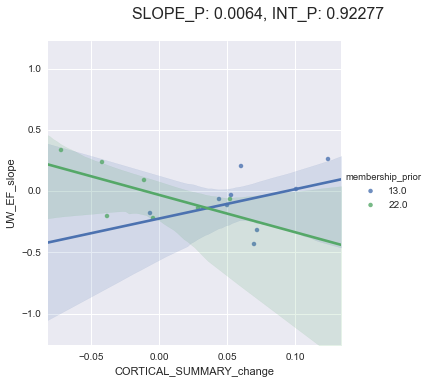

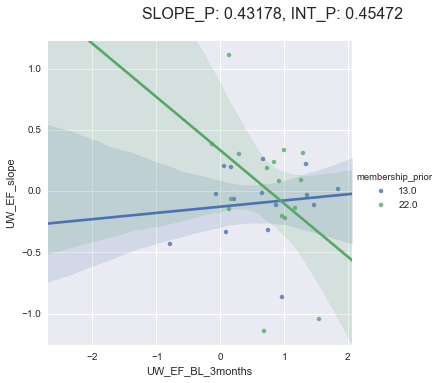

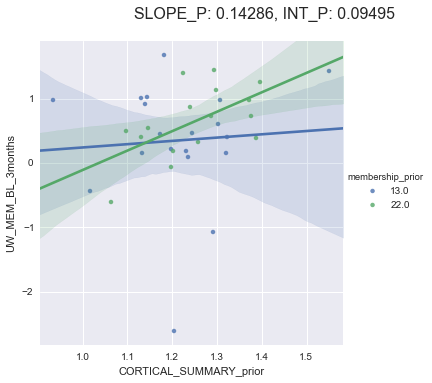

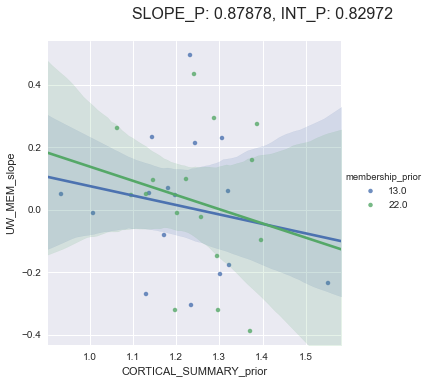

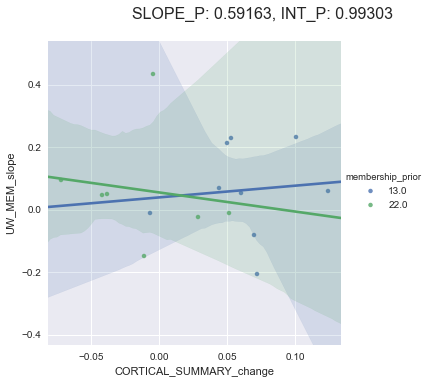

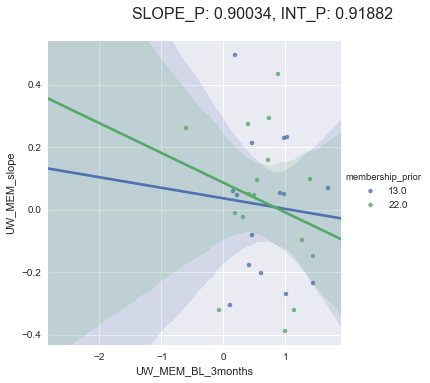

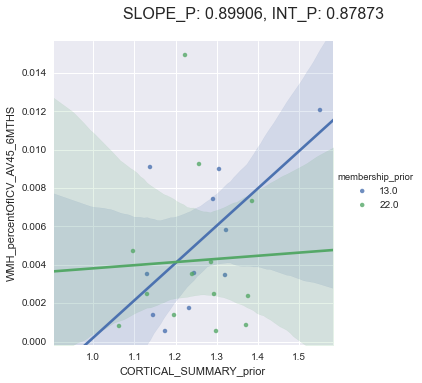

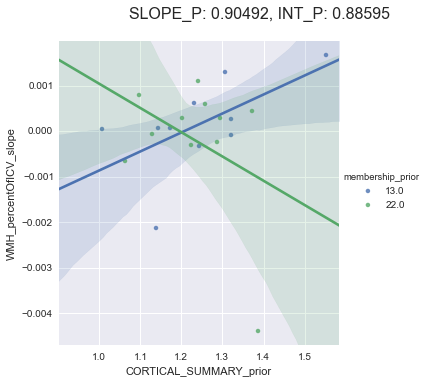

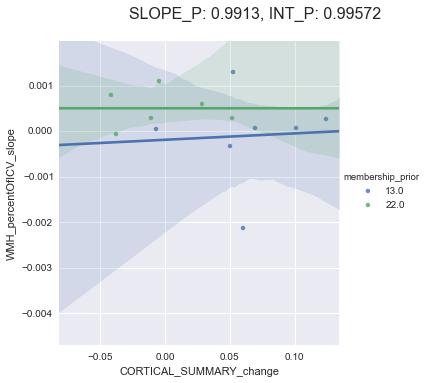

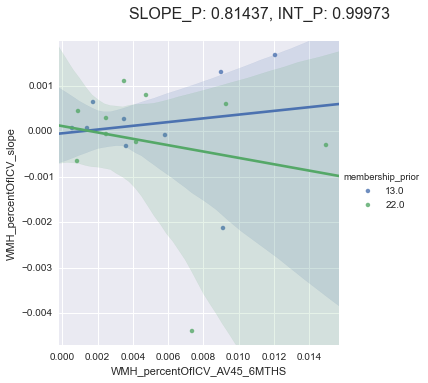

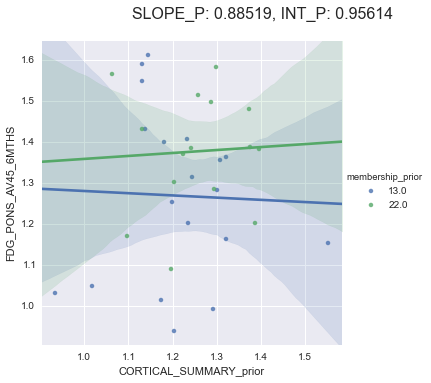

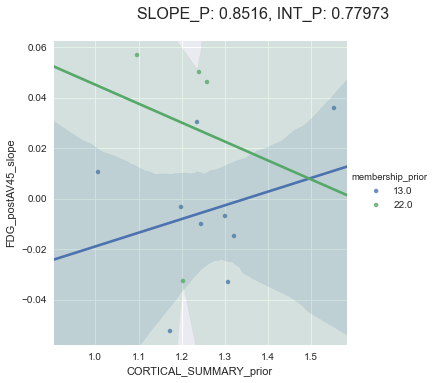

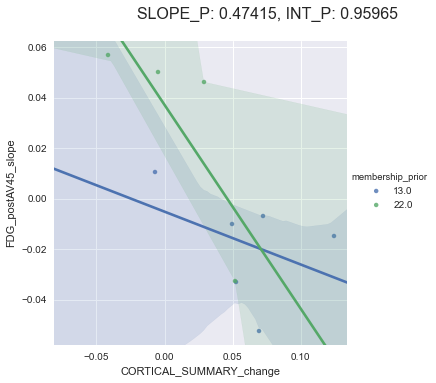

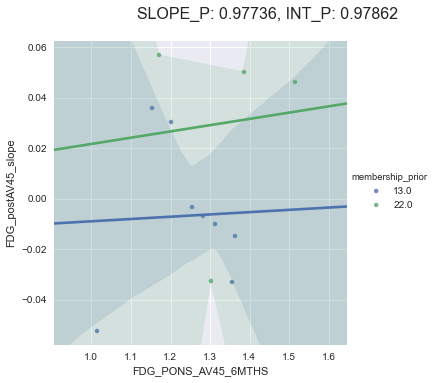

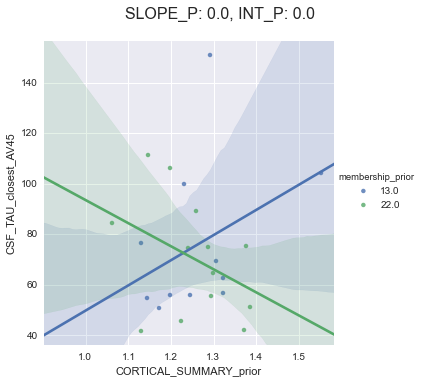

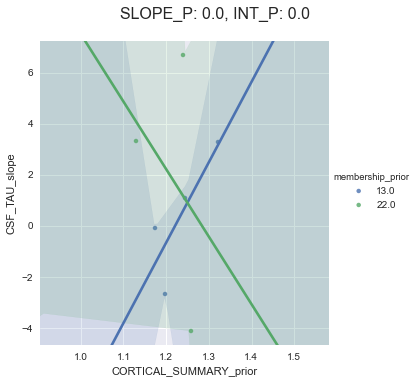

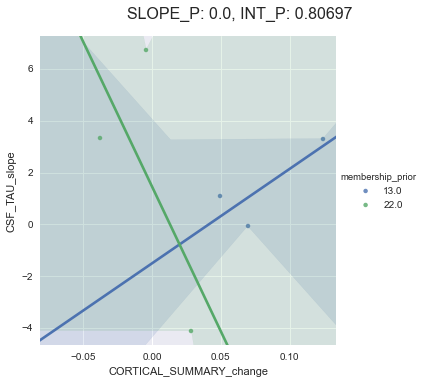

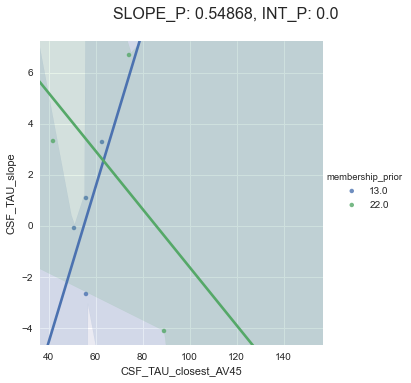

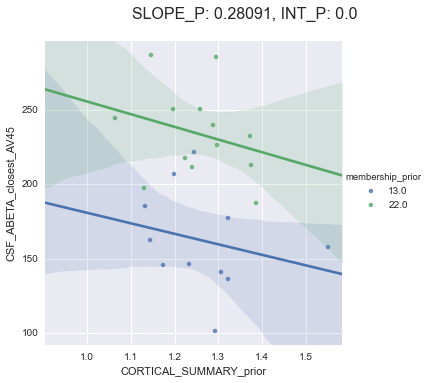

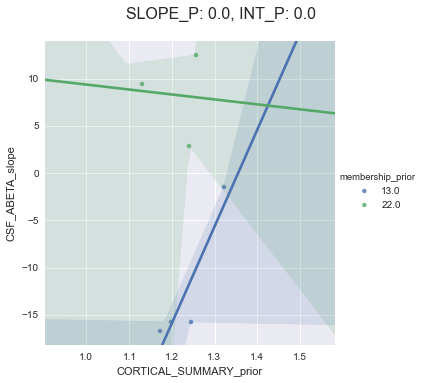

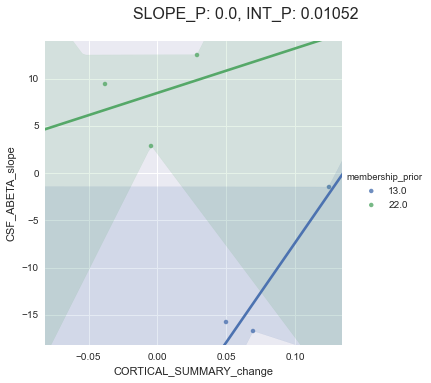

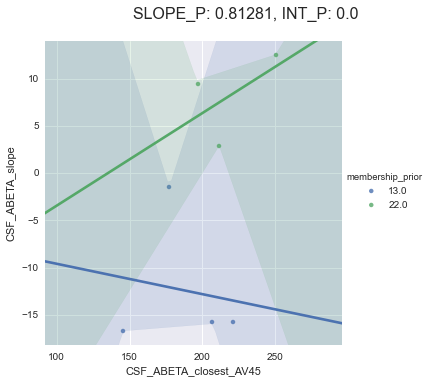

In [5]:
plotValueScatter(result_df, [13,22], xys=to_scatter, fit_reg=True, test=True)

CORTICAL_SUMMARY_prior vs UW_EF_slope: SLOPE_P: 0.01408, INT_P: 0.00132
CORTICAL_SUMMARY_prior vs UW_MEM_BL_3months: SLOPE_P: 0.00417, INT_P: 0.00032
CORTICAL_SUMMARY_prior vs CSF_TAU_closest_AV45: SLOPE_P: 0.0, INT_P: 0.0
CORTICAL_SUMMARY_prior vs CSF_TAU_slope: SLOPE_P: 8e-05, INT_P: 0.0
CORTICAL_SUMMARY_change vs CSF_TAU_slope: SLOPE_P: 0.0, INT_P: 0.95274
CSF_TAU_closest_AV45 vs CSF_TAU_slope: SLOPE_P: 0.83303, INT_P: 0.0
CORTICAL_SUMMARY_prior vs CSF_ABETA_closest_AV45: SLOPE_P: 0.14698, INT_P: 0.00292
CORTICAL_SUMMARY_prior vs CSF_ABETA_slope: SLOPE_P: 0.3023, INT_P: 0.0164
CORTICAL_SUMMARY_change vs CSF_ABETA_slope: SLOPE_P: 0.00236, INT_P: 0.39101
CSF_ABETA_closest_AV45 vs CSF_ABETA_slope: SLOPE_P: 0.92441, INT_P: 0.0


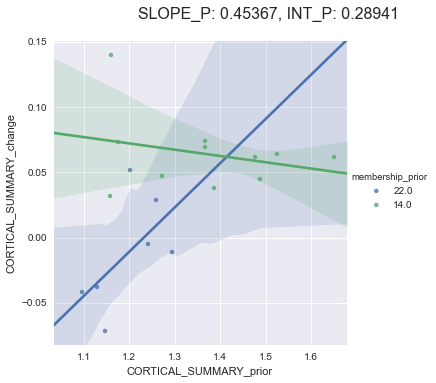

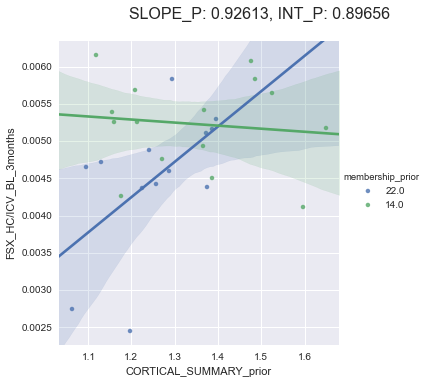

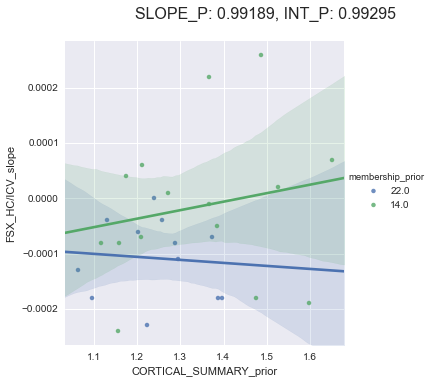

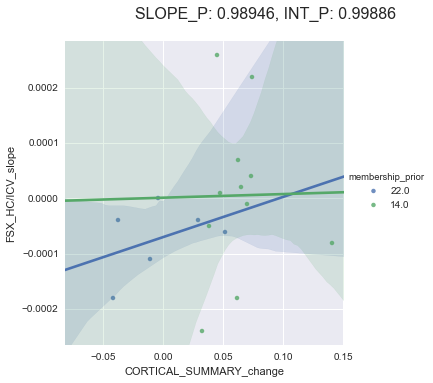

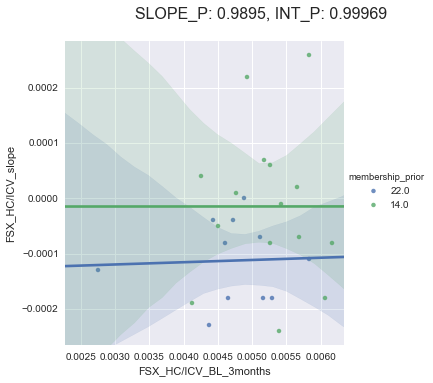

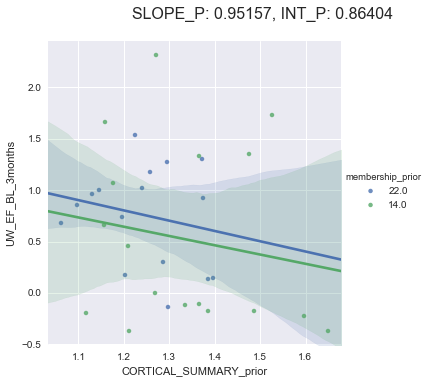

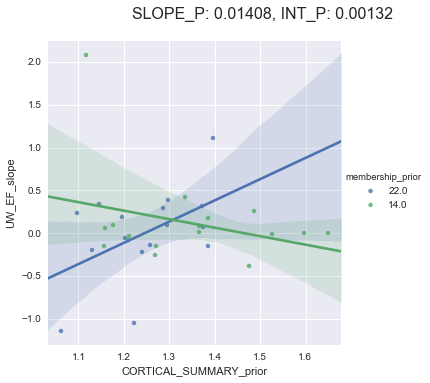

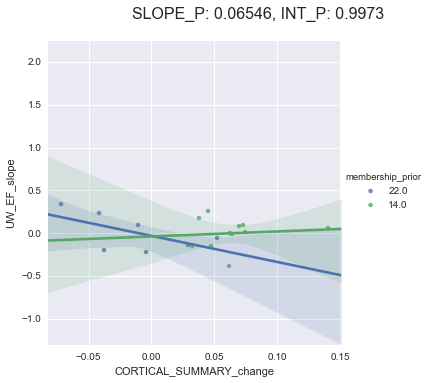

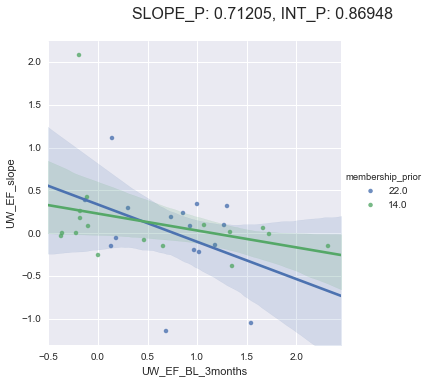

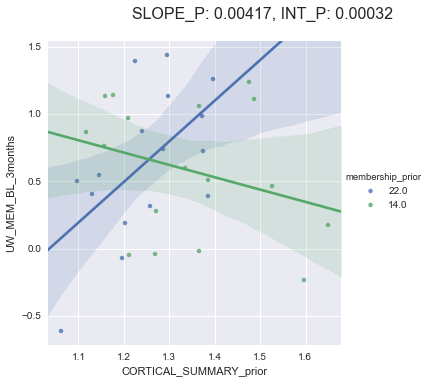

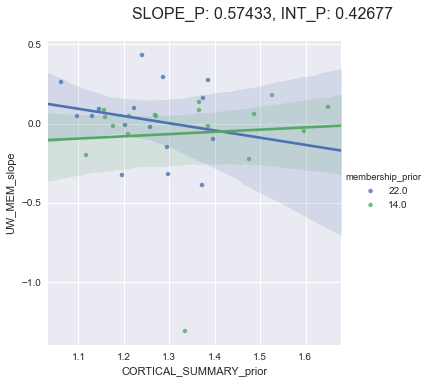

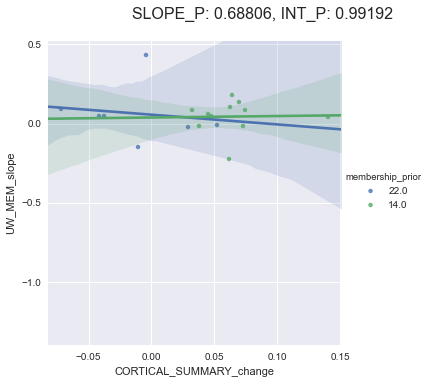

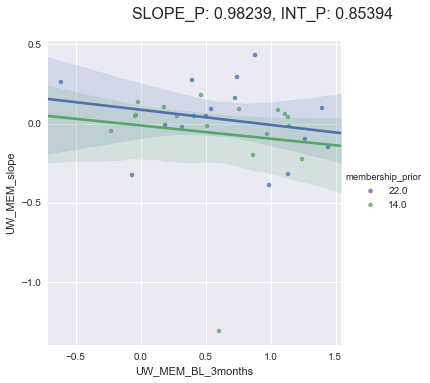

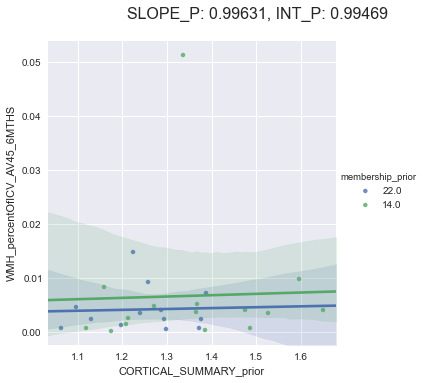

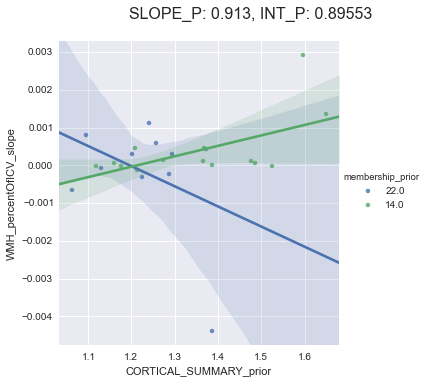

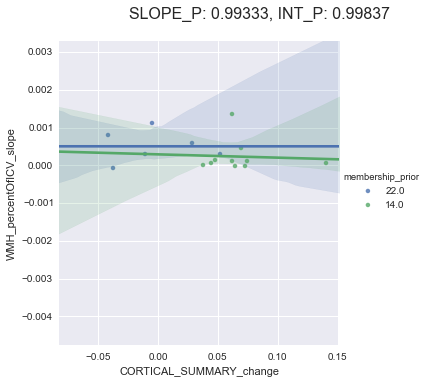

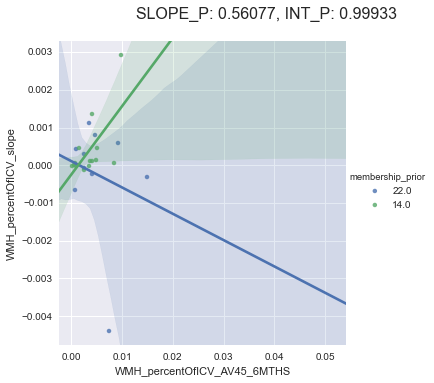

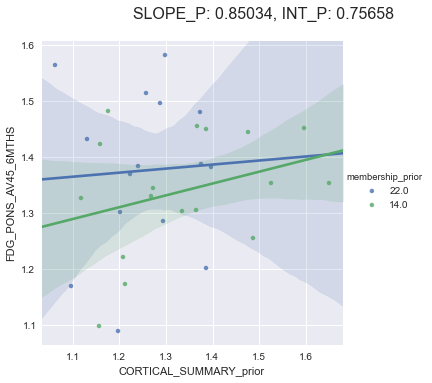

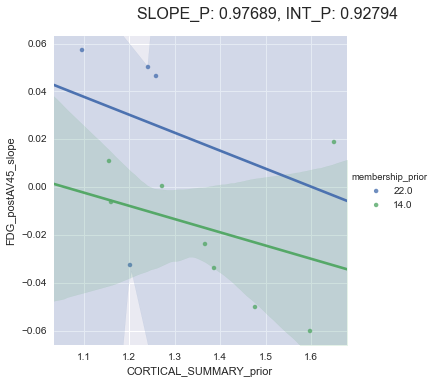

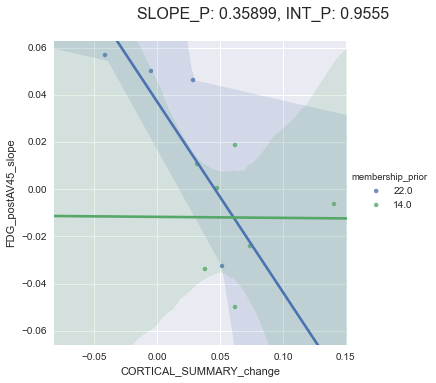

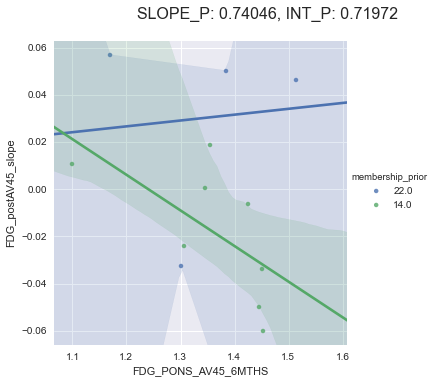

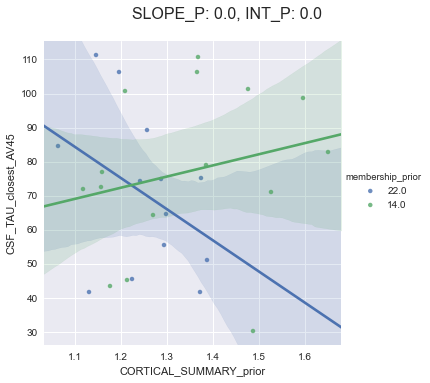

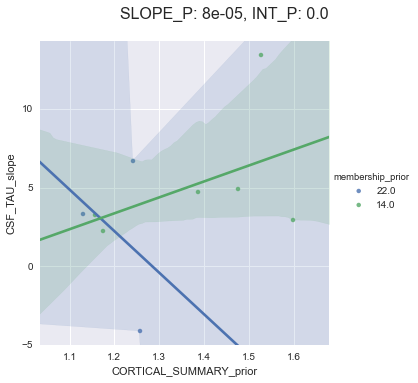

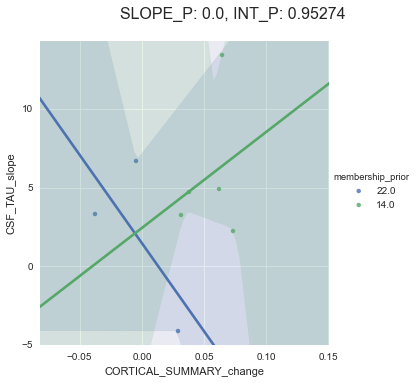

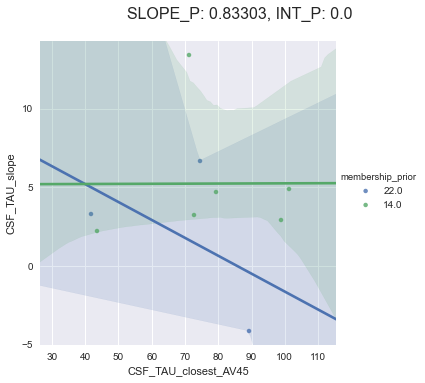

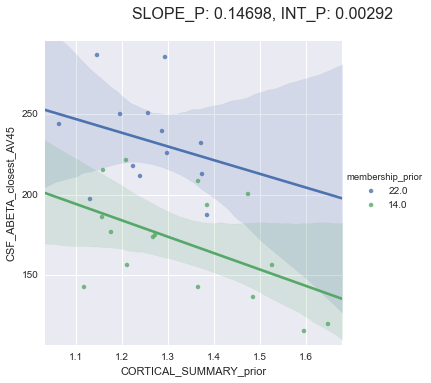

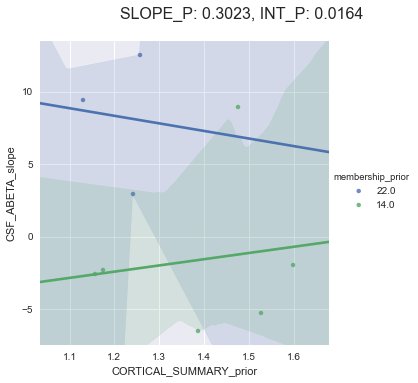

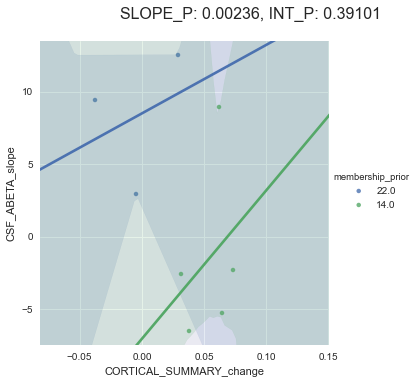

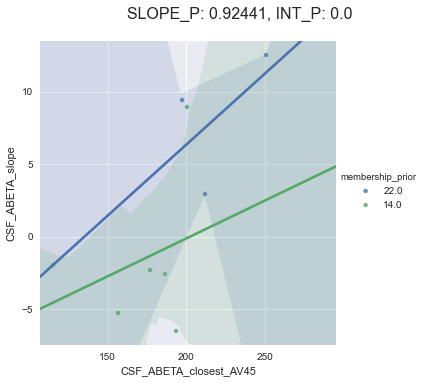

In [6]:
plotValueScatter(result_df, [14,22], xys=to_scatter, fit_reg=True, test=True)

CORTICAL_SUMMARY_prior vs CSF_TAU_closest_AV45: SLOPE_P: 0.0, INT_P: 0.1014


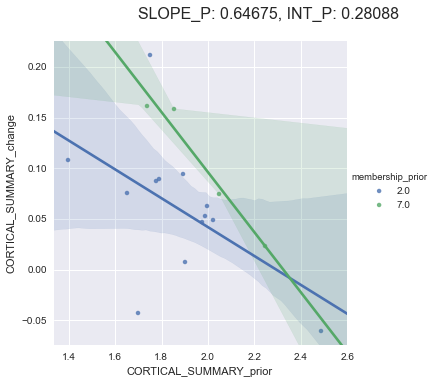

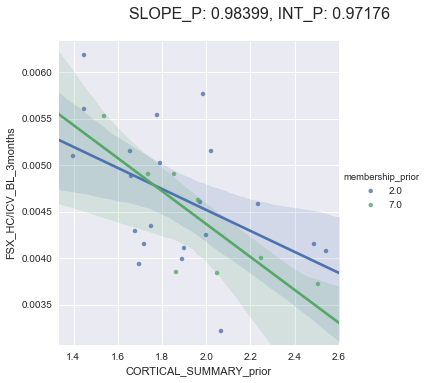

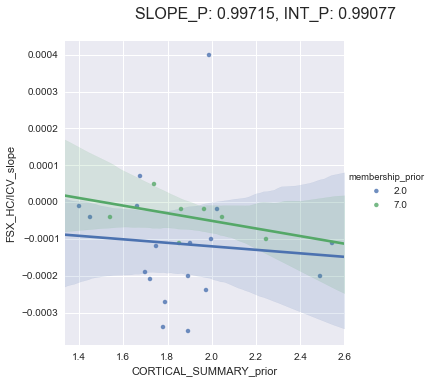

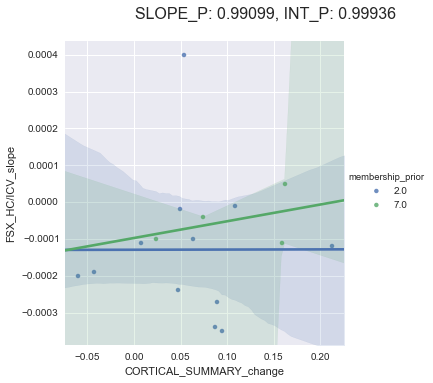

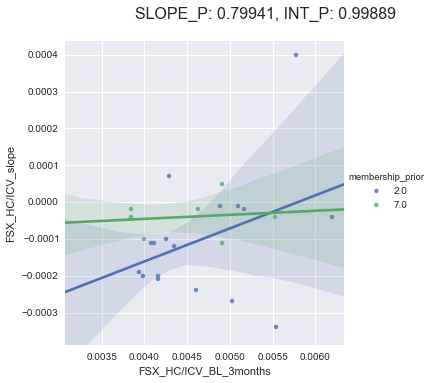

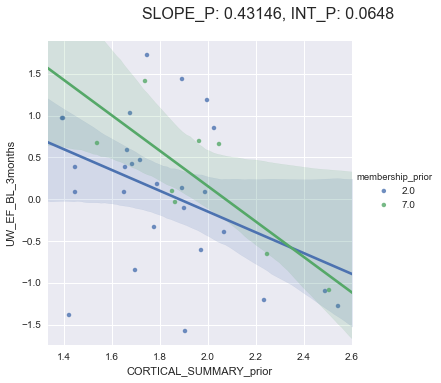

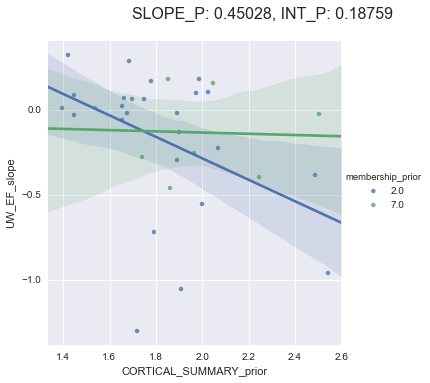

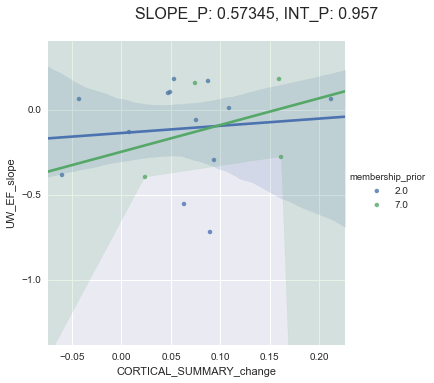

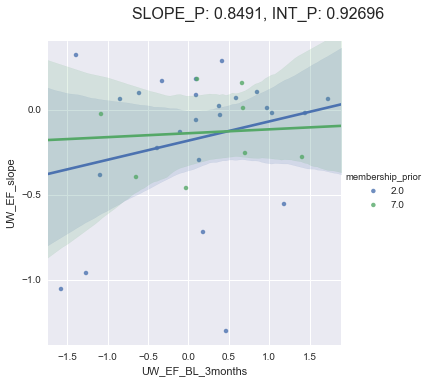

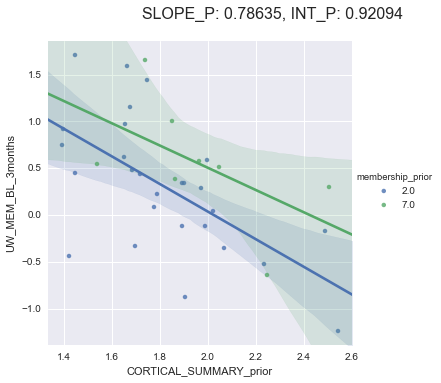

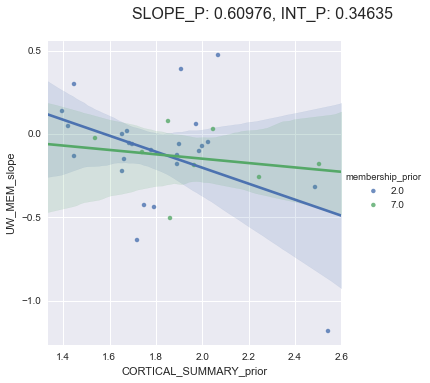

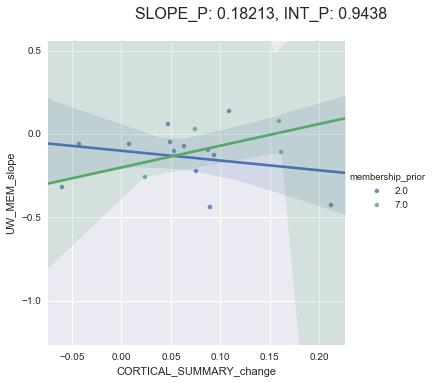

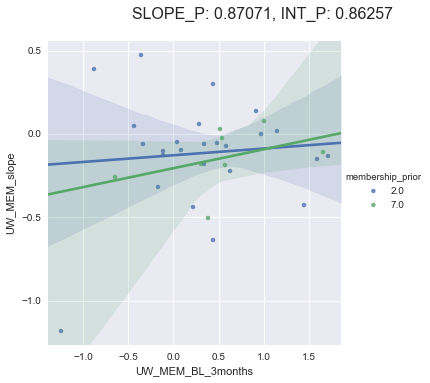

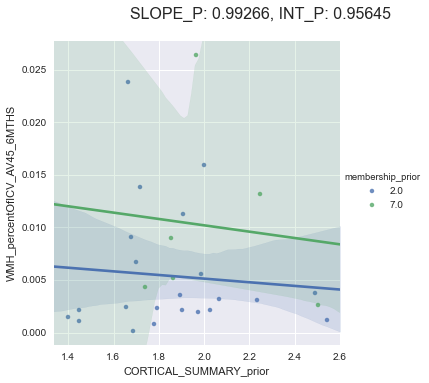

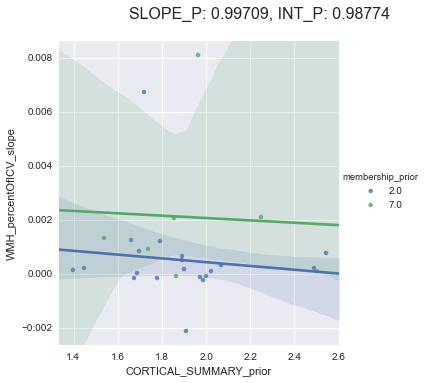

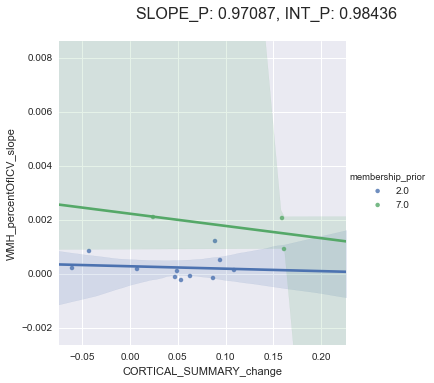

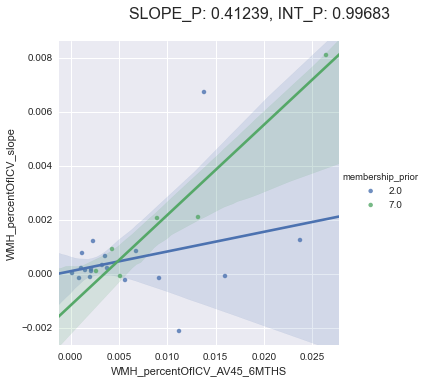

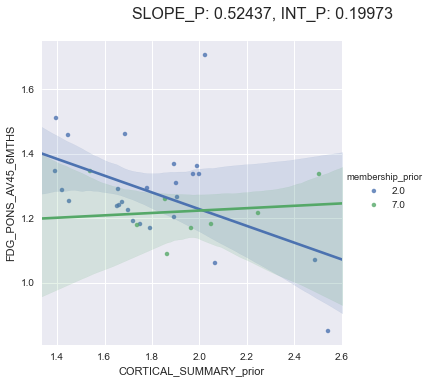

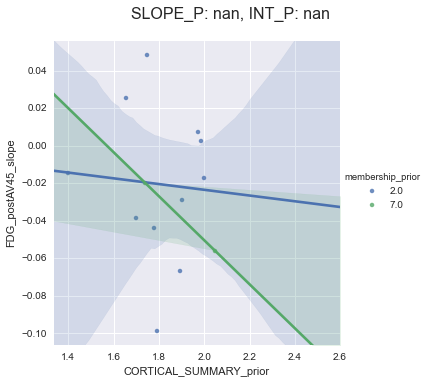

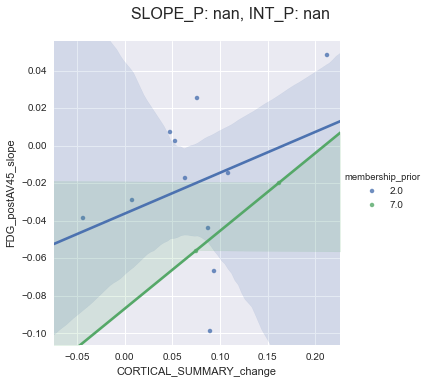

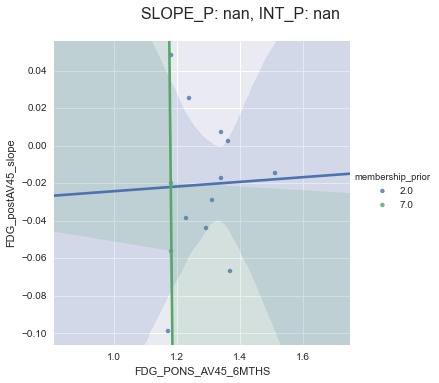

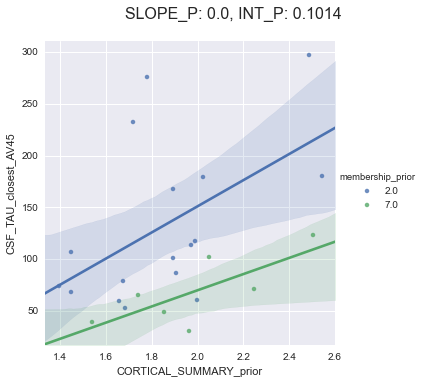

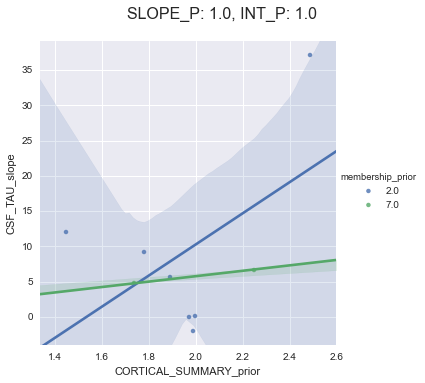

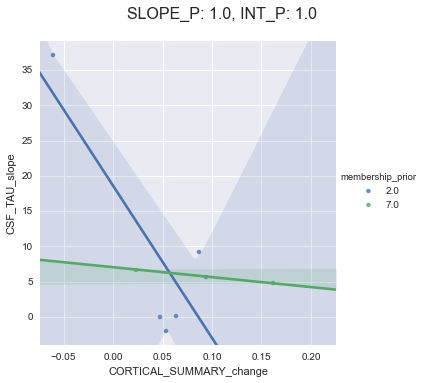

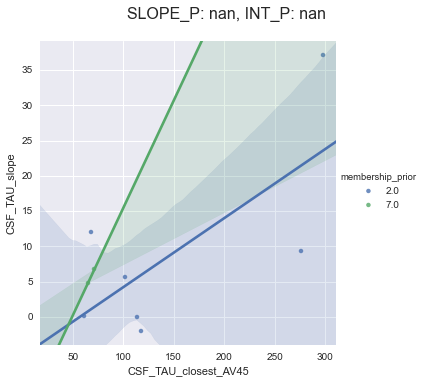

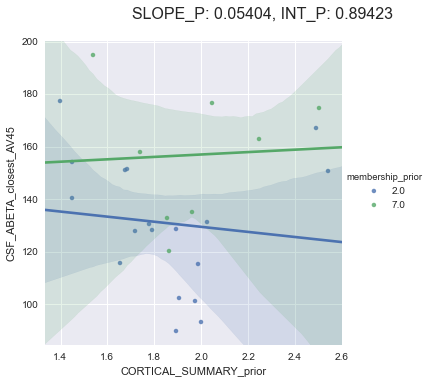

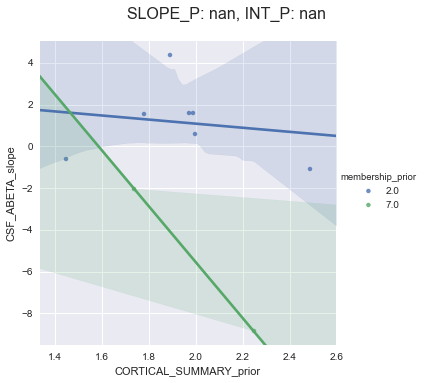

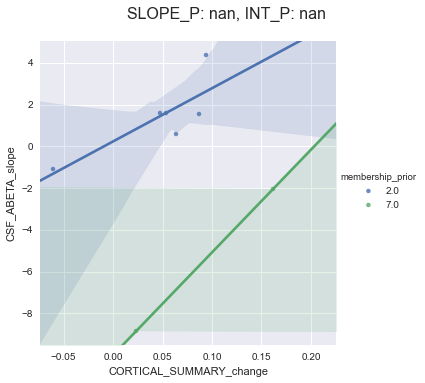

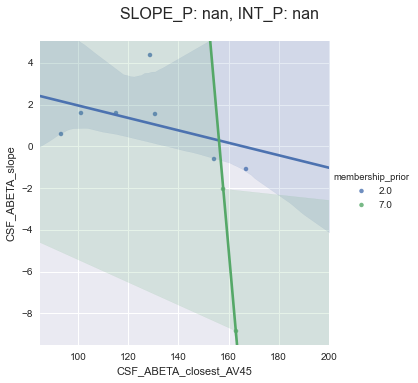

In [7]:
plotValueScatter(result_df, [2,7], xys=to_scatter, fit_reg=True, test=True)

CORTICAL_SUMMARY_prior vs CSF_TAU_closest_AV45: SLOPE_P: 0.0, INT_P: 0.0
CORTICAL_SUMMARY_prior vs CSF_TAU_slope: SLOPE_P: 0.0, INT_P: 0.0
CORTICAL_SUMMARY_change vs CSF_TAU_slope: SLOPE_P: 0.0, INT_P: 0.05402
CSF_TAU_closest_AV45 vs CSF_TAU_slope: SLOPE_P: 0.47329, INT_P: 0.0
CORTICAL_SUMMARY_prior vs CSF_ABETA_slope: SLOPE_P: 0.15887, INT_P: 2e-05
CORTICAL_SUMMARY_change vs CSF_ABETA_slope: SLOPE_P: 0.02313, INT_P: 0.42874
CSF_ABETA_closest_AV45 vs CSF_ABETA_slope: SLOPE_P: 0.78137, INT_P: 0.0


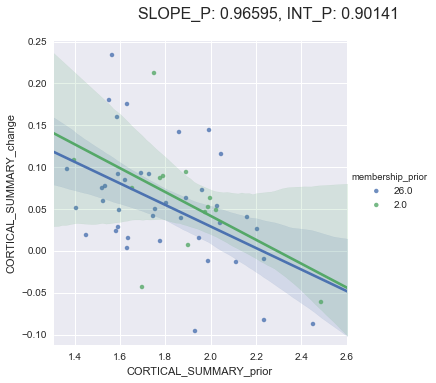

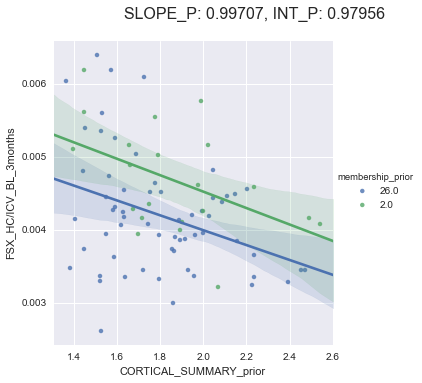

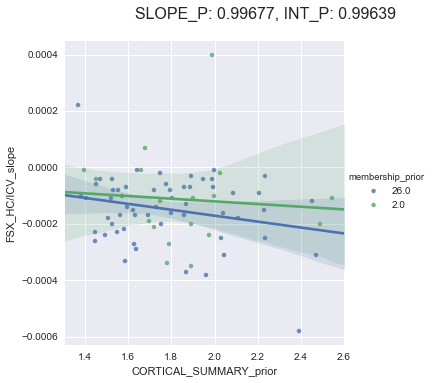

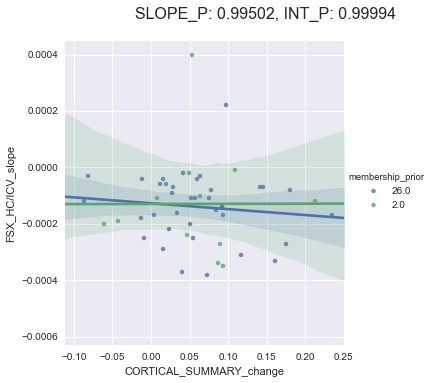

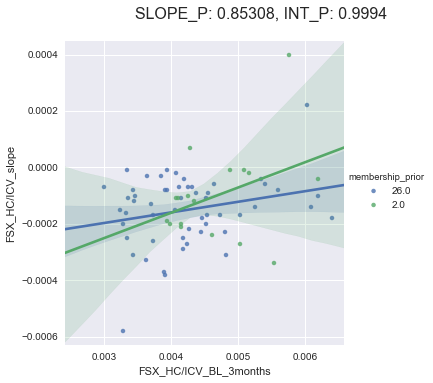

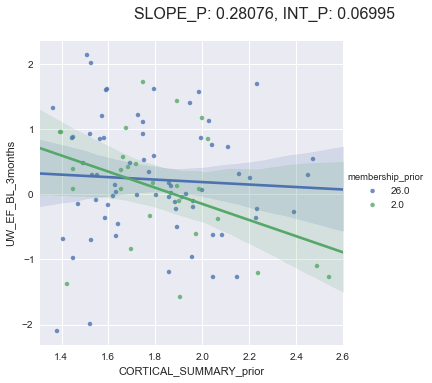

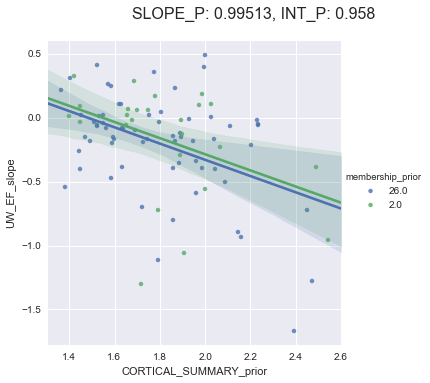

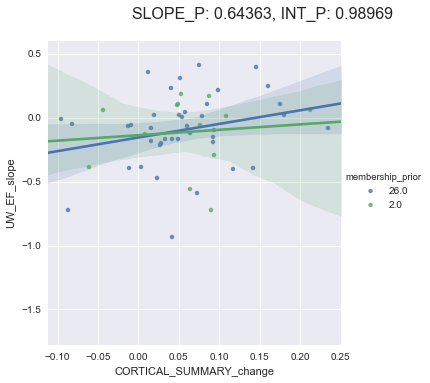

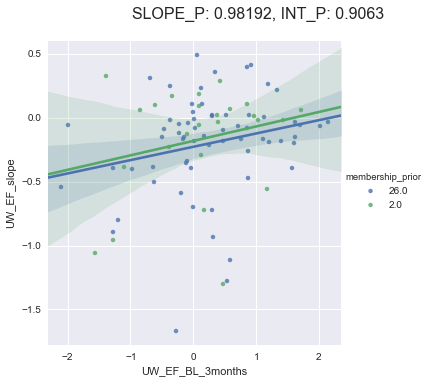

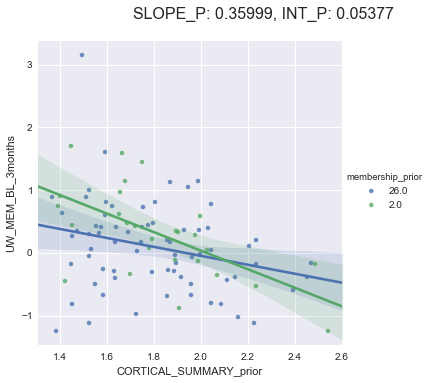

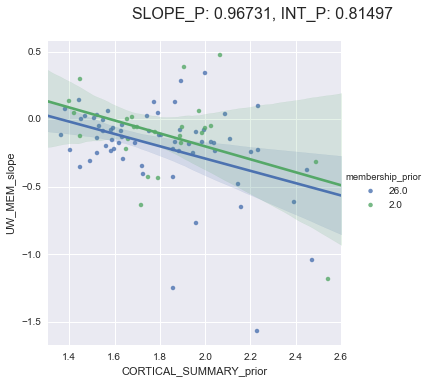

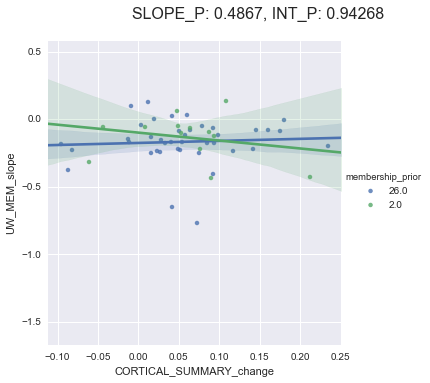

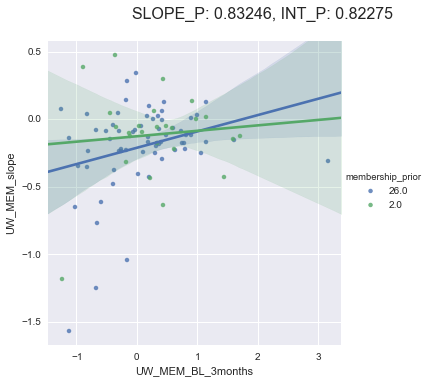

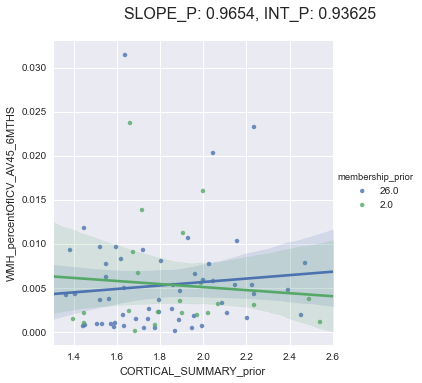

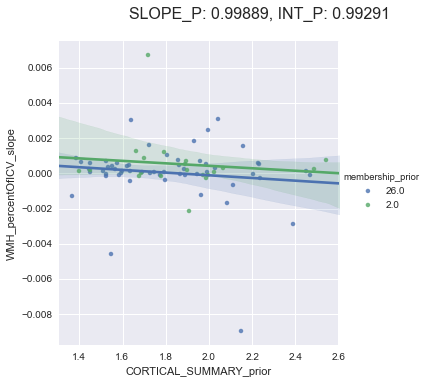

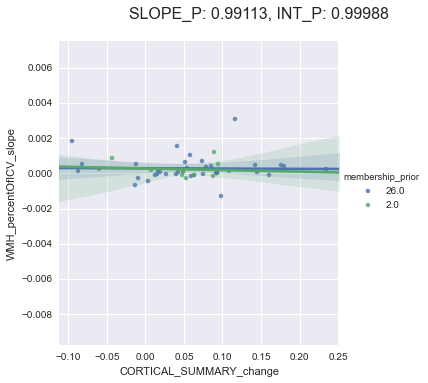

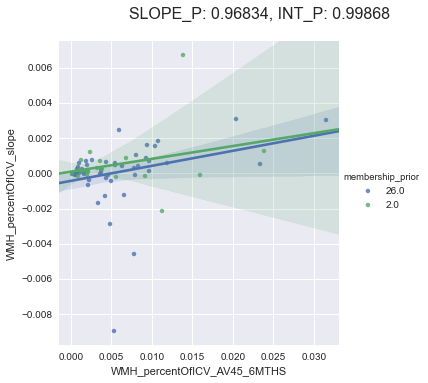

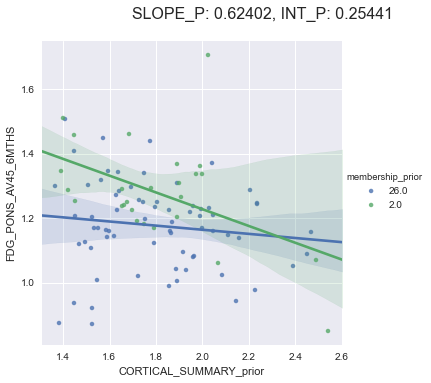

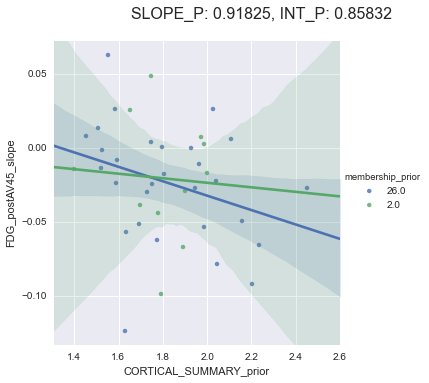

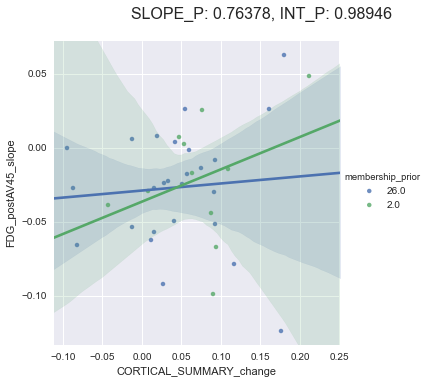

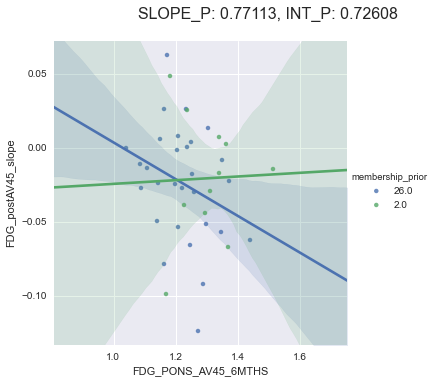

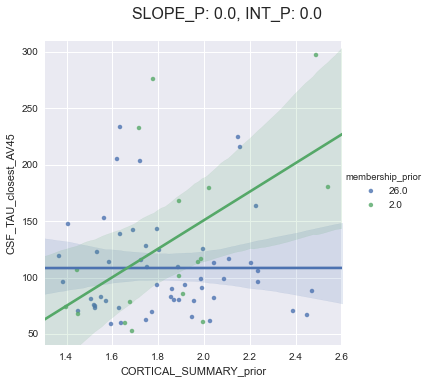

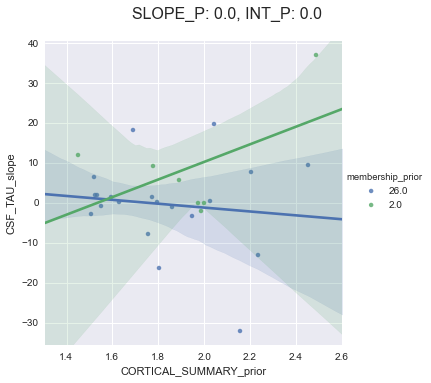

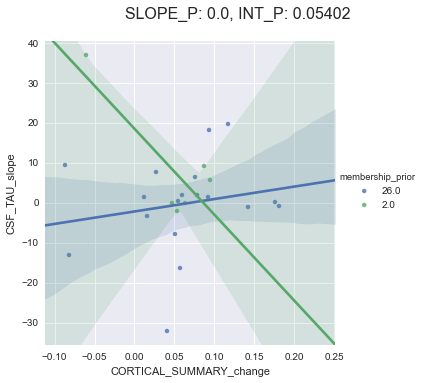

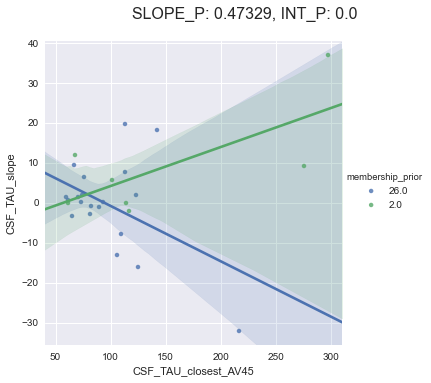

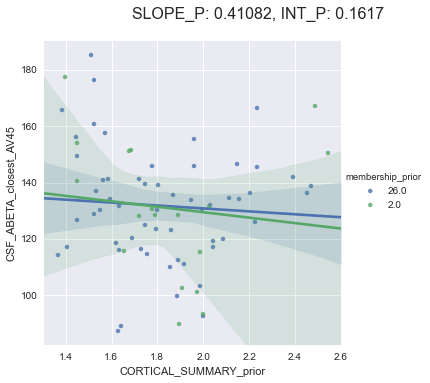

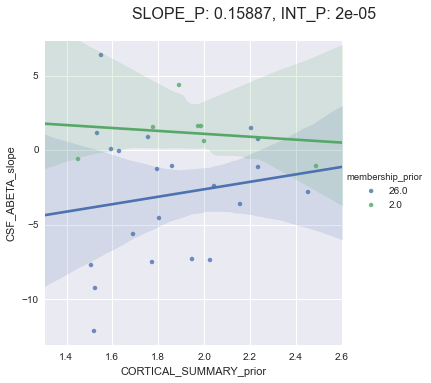

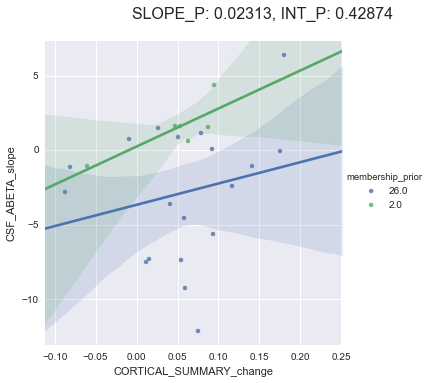

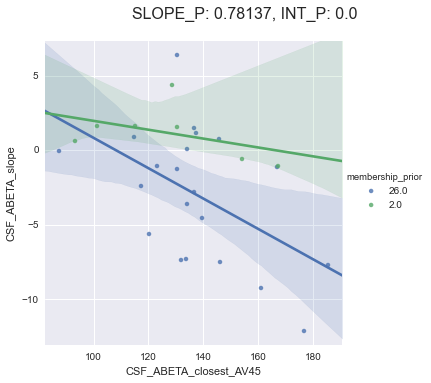

In [ ]:
plotValueScatter(result_df, [2,26], xys=to_scatter, fit_reg=True, test=True)

CORTICAL_SUMMARY_prior vs UW_EF_BL_3months: SLOPE_P: 0.10045, INT_P: 0.00021
CORTICAL_SUMMARY_prior vs CSF_TAU_closest_AV45: SLOPE_P: 0.0, INT_P: 0.0


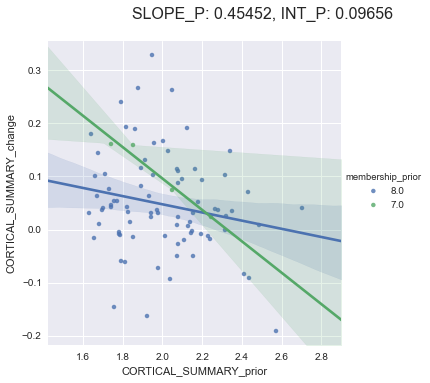

In [ ]:
plotValueScatter(result_df, [7,8], xys=to_scatter, fit_reg=True, test=True)

In [ ]:
plotValueScatter(result_df, [7,10], xys=to_scatter, fit_reg=True, test=True)

In [ ]:
plotValueScatter(result_df, [7,26], xys=to_scatter, fit_reg=True, test=True)

In [ ]:
plotValueScatter(result_df, [8,10], xys=to_scatter, fit_reg=True, test=True)